<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import os
import numpy as np

In [6]:
tf.enable_eager_execution()
np.random.seed(0)
tf.set_random_seed(0)

W1109 00:11:18.258126 140309681673024 module_wrapper.py:139] From /tmp/ipykernel_1572794/734876430.py:1: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.

W1109 00:11:18.260605 140309681673024 module_wrapper.py:139] From /tmp/ipykernel_1572794/734876430.py:3: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



Building model

In [7]:
import os
print (os.getcwd())

/home/ajita/Documents/data_integration/scDREAMER/scDREAMER


In [8]:
data_path = "/home/ajita/Documents/data_integration/hum_mou/hcl_mca_merged.h5ad"
#data_path = "/home/ajita/Documents/data_integration/hum_mou/hcl_mca_merged.h5ad"

In [9]:
name = "Human_Mouse"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }    
our_method_emb_dic = {'Immune_Human' : 'Immune_Human_case2_latent_matrix_c_300',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                }  

W1109 00:11:19.086689 140309681673024 module_wrapper.py:139] From /tmp/ipykernel_1572794/513104165.py:7: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1109 00:11:19.088104 140309681673024 module_wrapper.py:139] From /tmp/ipykernel_1572794/513104165.py:12: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2022-11-09 00:11:19.089764: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-11-09 00:11:19.122610: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2022-11-09 00:11:19.130910: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5636ec13c140 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-09 00:11:19.130962: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-11-

came in load_gene
updated hvg


W1109 00:12:01.651582 140309681673024 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_hum_mou.py:9: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1109 00:12:01.661709 140309681673024 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_hum_mou.py:273: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1109 00:12:01.663125 140309681673024 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new.py:18: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1109 00:12:01.663955 140309681673024 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addon

here [61 61 61 ... 20 90 40]
Shape self.data_train: (933704, 2000)
Shape self.data_test: (933704, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2002), dtype=float32)


W1109 00:12:01.977162 140309681673024 deprecation.py:506] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_hum_mou.py:302: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1109 00:12:03.020149 140309681673024 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_hum_mou.py:43: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W1109 00:12:03.022235 140309681673024 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_hum_mou.py:613: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



decoder input shape  Tensor("concat_1:0", shape=(?, 12), dtype=float32)
entering in for loop 1   512  -- > 256


W1109 00:12:03.302520 140309681673024 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new.py:41: The name tf.log is deprecated. Please use tf.math.log instead.

W1109 00:12:03.311878 140309681673024 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new.py:41: The name tf.lgamma is deprecated. Please use tf.math.lgamma instead.

W1109 00:12:03.354226 140309681673024 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_hum_mou.py:131: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W1109 00:12:03.426874 140309681673024 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/

No of cell types 97
classifier logit is:  Tensor("classifier/matmul_1:0", shape=(?, 97), dtype=float32)
u is:  Tensor("sample_gaussian_2/random_normal:0", shape=(?, 6), dtype=float32)
z is:  Tensor("sample_gaussian/random_normal:0", shape=(?, 10), dtype=float32)
KL gaussian z Tensor("mul_13:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_12:0", shape=(?,), dtype=float32)


W1109 00:12:03.469650 140309681673024 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_hum_mou.py:162: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1109 00:12:03.505549 140309681673024 deprecation.py:323] From /home/ajita/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Cluster DRA on DataSet /home/ajita/Documents/data_integration/hum_mou/hcl_mca_merged.h5ad ... 


W1109 00:12:05.242692 140309681673024 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_hum_mou.py:178: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



Epoch : [0] ,  a_loss = 151.5352, d_loss: -0.0613 , db_loss: 0.8437
Epoch : [1] ,  a_loss = 218.1763, d_loss: -0.0475 , db_loss: 1.0696
Epoch : [2] ,  a_loss = 178.4436, d_loss: -0.0117 , db_loss: 0.2562
Epoch : [3] ,  a_loss = 124.9425, d_loss: -0.0053 , db_loss: 0.3889
Epoch : [4] ,  a_loss = 87.1769, d_loss: -0.0019 , db_loss: 2.0622
Epoch : [5] ,  a_loss = 105.1353, d_loss: -0.0019 , db_loss: 0.2381
Epoch : [6] ,  a_loss = 115.3570, d_loss: -0.0024 , db_loss: 0.3364
Epoch : [7] ,  a_loss = 132.1298, d_loss: -0.0017 , db_loss: 0.0743
Epoch : [8] ,  a_loss = 86.2947, d_loss: -0.0026 , db_loss: 2.0494
Epoch : [9] ,  a_loss = 141.3386, d_loss: -0.0020 , db_loss: 0.4199
Epoch : [10] ,  a_loss = 100.2489, d_loss: -0.0023 , db_loss: 0.2334
Epoch : [11] ,  a_loss = 137.8626, d_loss: -0.0022 , db_loss: 0.7630
Epoch : [12] ,  a_loss = 124.0943, d_loss: -0.0022 , db_loss: 0.0771
Epoch : [13] ,  a_loss = 136.7246, d_loss: -0.0025 , db_loss: 0.0188
Epoch : [14] ,  a_loss = 163.9144, d_loss: -0.

Epoch : [120] ,  a_loss = 69.1999, d_loss: -0.0073 , db_loss: 0.1247
Epoch : [121] ,  a_loss = 71.4103, d_loss: -0.0066 , db_loss: 0.3779
Epoch : [122] ,  a_loss = 81.5894, d_loss: -0.0030 , db_loss: 0.0959
Epoch : [123] ,  a_loss = 109.1268, d_loss: -0.0064 , db_loss: 0.0751
Epoch : [124] ,  a_loss = 190.5472, d_loss: -0.0027 , db_loss: 0.1778
Epoch : [125] ,  a_loss = 74.6229, d_loss: -0.0071 , db_loss: 0.3062
Epoch : [126] ,  a_loss = 108.0096, d_loss: -0.0058 , db_loss: 0.0682
Epoch : [127] ,  a_loss = 126.4780, d_loss: -0.0040 , db_loss: 0.0524
Epoch : [128] ,  a_loss = 101.5521, d_loss: -0.0051 , db_loss: 0.2817
Epoch : [129] ,  a_loss = 88.4415, d_loss: -0.0036 , db_loss: 0.0002
Epoch : [130] ,  a_loss = 92.9142, d_loss: -0.0093 , db_loss: 0.6023
Epoch : [131] ,  a_loss = 154.9209, d_loss: -0.0041 , db_loss: 0.5525
Epoch : [132] ,  a_loss = 105.4189, d_loss: -0.0047 , db_loss: 0.0215
Epoch : [133] ,  a_loss = 84.7182, d_loss: -0.0059 , db_loss: 0.0364
Epoch : [134] ,  a_loss = 9

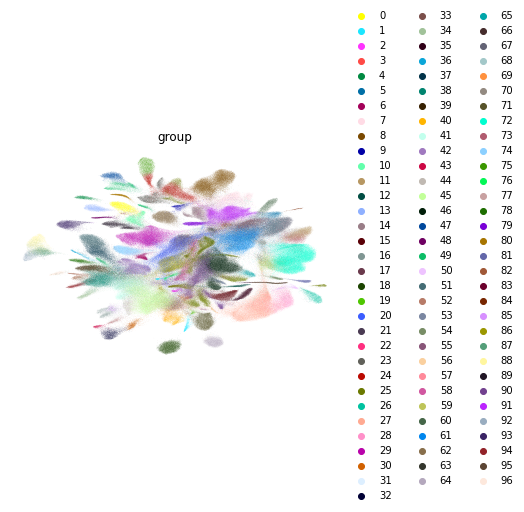

None


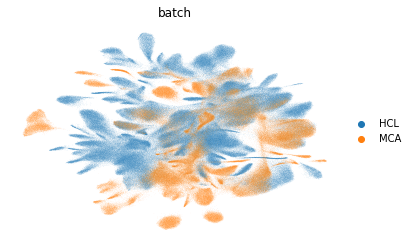

None
Computing NMI ...
Done !
NMI = 0.7608454607062352
Epoch : [201] ,  a_loss = 93.0384, d_loss: -0.0086 , db_loss: 0.0105
Epoch : [202] ,  a_loss = 73.4910, d_loss: -0.0037 , db_loss: 0.0124
Epoch : [203] ,  a_loss = 93.6864, d_loss: -0.0086 , db_loss: 0.5246
Epoch : [204] ,  a_loss = 130.0772, d_loss: -0.0097 , db_loss: 0.4373
Epoch : [205] ,  a_loss = 76.1122, d_loss: -0.0051 , db_loss: 0.1980
Epoch : [206] ,  a_loss = 85.2006, d_loss: -0.0087 , db_loss: 0.2377
Epoch : [207] ,  a_loss = 89.1960, d_loss: -0.0119 , db_loss: 0.3050
Epoch : [208] ,  a_loss = 118.7645, d_loss: -0.0069 , db_loss: 0.6288
Epoch : [209] ,  a_loss = 68.5655, d_loss: -0.0062 , db_loss: 0.1452
Epoch : [210] ,  a_loss = 90.2838, d_loss: -0.0130 , db_loss: 0.7000
Epoch : [211] ,  a_loss = 102.8514, d_loss: -0.0062 , db_loss: 0.0252
Epoch : [212] ,  a_loss = 60.6952, d_loss: -0.0225 , db_loss: 0.4478
Epoch : [213] ,  a_loss = 77.6346, d_loss: -0.0037 , db_loss: 0.1643
Epoch : [214] ,  a_loss = 184.0137, d_loss: -

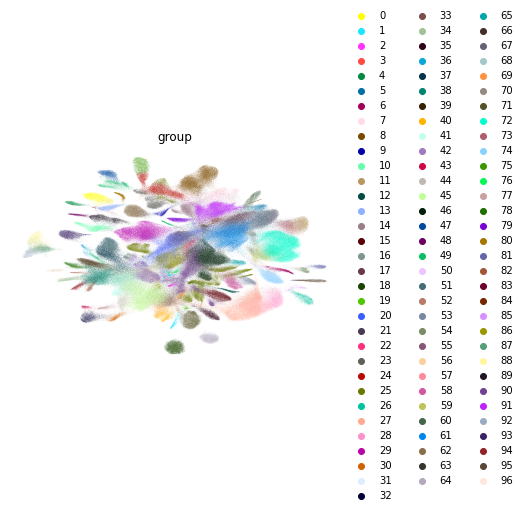

None


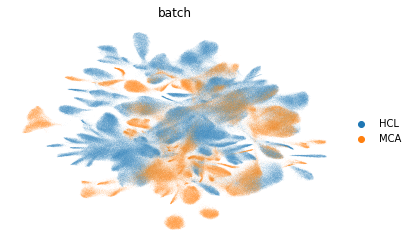

None
Computing NMI ...
Done !
NMI = 0.7617286234355143
Epoch : [251] ,  a_loss = 95.1797, d_loss: -0.0075 , db_loss: 0.0075
Epoch : [252] ,  a_loss = 70.2165, d_loss: -0.0150 , db_loss: 0.2874
Epoch : [253] ,  a_loss = 93.3244, d_loss: -0.0069 , db_loss: 0.1949
Epoch : [254] ,  a_loss = 79.0409, d_loss: -0.0074 , db_loss: 0.3608
Epoch : [255] ,  a_loss = 99.2064, d_loss: -0.0078 , db_loss: 0.2327
Epoch : [256] ,  a_loss = 110.0789, d_loss: -0.0178 , db_loss: 0.0004
Epoch : [257] ,  a_loss = 99.6028, d_loss: -0.0052 , db_loss: 0.2142
Epoch : [258] ,  a_loss = 71.0286, d_loss: -0.0125 , db_loss: 0.0332
Epoch : [259] ,  a_loss = 82.7396, d_loss: -0.0224 , db_loss: 0.0670
Epoch : [260] ,  a_loss = 93.1785, d_loss: -0.0078 , db_loss: 0.0665
Epoch : [261] ,  a_loss = 65.6552, d_loss: -0.0067 , db_loss: 0.1058
Epoch : [262] ,  a_loss = 105.5978, d_loss: -0.0058 , db_loss: 0.4215
Epoch : [263] ,  a_loss = 63.9722, d_loss: -0.0074 , db_loss: 0.1161
Epoch : [264] ,  a_loss = 90.7149, d_loss: -0.

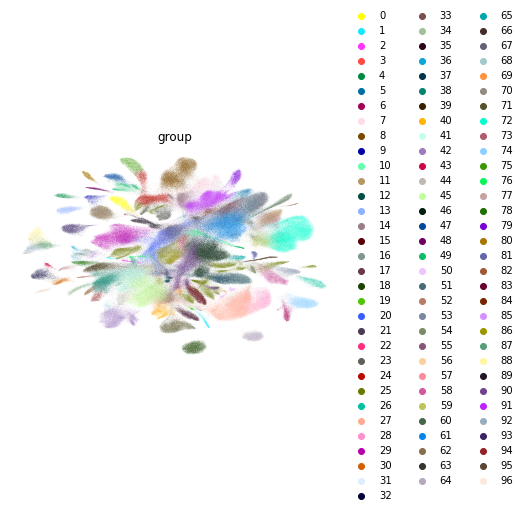

None


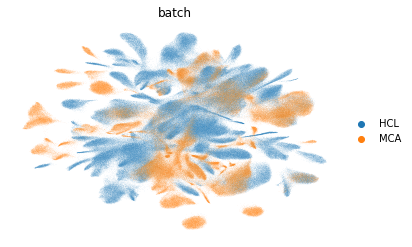

None
Computing NMI ...
Done !
NMI = 0.7655796502328539
Epoch : [301] ,  a_loss = 81.2812, d_loss: -0.0079 , db_loss: 0.0093
Epoch : [302] ,  a_loss = 122.2944, d_loss: -0.0040 , db_loss: 0.4568
Epoch : [303] ,  a_loss = 76.0090, d_loss: -0.0115 , db_loss: 0.1573
Epoch : [304] ,  a_loss = 133.8208, d_loss: -0.0080 , db_loss: 0.4809
Epoch : [305] ,  a_loss = 85.5124, d_loss: -0.0100 , db_loss: 0.0954
Epoch : [306] ,  a_loss = 104.7344, d_loss: -0.0084 , db_loss: 0.1644
Epoch : [307] ,  a_loss = 148.5664, d_loss: -0.0031 , db_loss: 0.1792
Epoch : [308] ,  a_loss = 88.8425, d_loss: -0.0031 , db_loss: 0.0717
Epoch : [309] ,  a_loss = 133.5689, d_loss: -0.0038 , db_loss: 0.0502
Epoch : [310] ,  a_loss = 71.5441, d_loss: -0.0113 , db_loss: 0.0170
Epoch : [311] ,  a_loss = 77.7275, d_loss: -0.0046 , db_loss: 0.6498
Epoch : [312] ,  a_loss = 128.6990, d_loss: -0.0085 , db_loss: 3.0369
Epoch : [313] ,  a_loss = 81.2050, d_loss: -0.0079 , db_loss: 0.2196
Epoch : [314] ,  a_loss = 68.9634, d_loss:

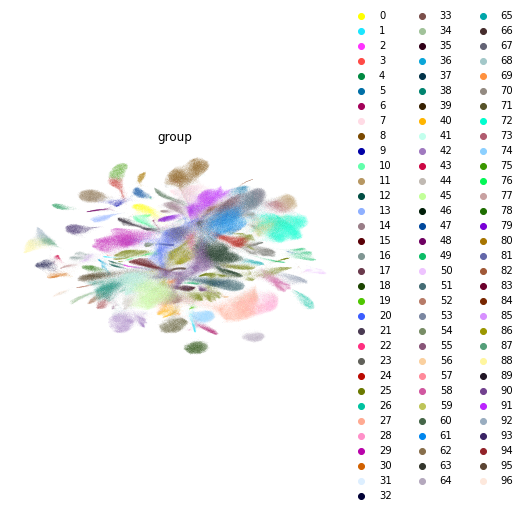

None


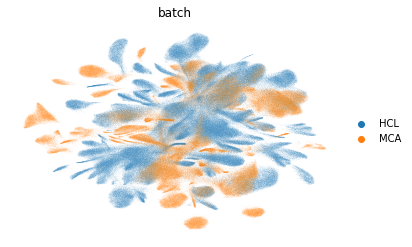

None
Computing NMI ...
Done !
NMI = 0.7636442480096457


In [10]:
#import model
#import model_wo_Dis as model# without Discriminator
#import model_wo_BC as model # without Batch Classiifer
import model_scanvi_hum_mou as model


run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 400,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()

